# pygsf 1: geometry

*March-April, 2018, Mauro Alberti, alberti.m65@gmail.com*

Developement code:

In [1]:
%load_ext autoreload
%autoreload 1

## 1. Introduction

**gsf** is a library for the processing of geological data. It is composed by two modules: *pygsf*, implemented in Python 3, and *hsgsf*, that is the corresponding, in-progress version in Haskell. In this notebook the Python version (*pygsf*) will be described.

**pygsf** can be imported in Python 3 via the command: 

In [2]:
import pygsf as gsf

We can be the version by issuing:

In [3]:
gsf.version

'1.0.3'

Prior to other operations, we import *mplstereonet*, for stereonet plotting, and run *%matplotlib inline*, for incorporating the plot in the notebook.

In [4]:
import mplstereonet
%matplotlib inline

Afterwards we import the *splot* function from the *plotting.stereonets* module.

In [5]:
from pygsf.plotting.stereonets import splot

## 2. Basic data types: points, vectors, axes and planes

Since geological data are expressed via geometric/geographical and physics concepts,
this module basics are geometric concepts: *points*, *planes*; and also *vectors*. 

From these concepts, more specialised, geological concepts are derived: *geological vectors* and *axes*, and *geological planes*. While geological planes are geometric planes, geological vectors and axes are basically vectors. 

In structural geology, orientations are expressed via angles from references directions (polar coordinates), such as the North  for azimuths, or as the local horizontal plane for the dip angle. 

We import all classes/methods from the geometry sub-module:

In [6]:
from pygsf.geometry import *

### 2.1 Cartesian points

A point can be created by providing three Cartesian coordinates:

In [7]:
p1 = Point(1.0, 2.4, 0.2)  # definition of a Point instance

We can calculate its distance from the reference frame origin via the method abs(): 

In [8]:
abs(p1)  # distance of a point from the origin

2.6076809620810595

When considering two points, we can calculate the 3D and the horizontal distance (2D) between them:

In [9]:
p2 = Point(0.9, 4.2, 10.5)

In [10]:
p1.dist_3d(p2)  # 3D distance between two points

10.45657687773585

In [11]:
p1.dist_2d(p2)  # horizontal (2D) distance between two points

1.8027756377319948

Other methods allow to translate the point position by providing three offset cartesian values (x, y, z) or directly via a vector, to check if two points are within a given range of each other and to convert a point to a vector.

### 2.2 Cartesian planes 

A Cartesian plane can be defined in a few different ways, but the simplest is by providing three points:

In [12]:
pl1 = Plane.from_points(Point(0, 0, 0), Point(1, 0, 0), Point(0, 1, 0))  # definition of a plane from three points

In [13]:
print(pl1)

Plane(0.0000, 0.0000, 1.0000, 0.0000)


The returned four coefficient (*a*, *b*, *c* and *d*) define the Cartesian plane following the equation: 

   *ax + by + cz = d*

For the considered example, the equation is satisfied for all *x* and *y* values provided that *z* is always zero, i.e. the Cartesian plane is a horizontal plane passing through the frame origin.
    

We calculate the versor normal to this plane:

In [14]:
normal_versor = pl1.nversor()  # versor (unit vector) normal to the provided Cartesian plane

In [15]:
print(normal_versor)

Vect(0.0000, 0.0000, 1.0000)


And we see that as expected the versor is vertical.

As another example, we calculate the intersection between two planes, as a versor:

In [16]:
pl1, pl2 = Plane(1, 0, 0, 0), Plane(0, 0, 1, 0)
inters_v = pl1.inters_versor(pl2)  # intersection versor between two Cartesian planes 
print(inters_v)

Vect(0.0000, -1.0000, 0.0000)


### 2.3 Cartesian vectors

Vector creation and manipulation are straightforward:

In [17]:
from pygsf.geometry import *
v1, v2 = Vect(3.1, 7.2, 5.6), Vect(4.2, 9.17, 8.0)

In [18]:
v1 + v2  # vector addition

Vect(7.3000, 16.3700, 13.6000)

In [19]:
v1 - v2  # vector subtraction

Vect(-1.1000, -1.9700, -2.4000)

Scalar and vector products are obtained via:

In [20]:
v1.sp(v2)  # scalar product

123.844

In [21]:
v1.vp(v2)  # vector product

Vect(6.2480, -1.2800, -1.8130)

The angle (in degrees) between two vectors, and the check if they are sub-parallel or sub-orthogonal: 

In [22]:
v1.angle(v2)  # angle in degrees bwtween two Cartesian vectors

3.0646173501805807

In [23]:
v1.almost_parallel(v2)  # is a vector sub-parallel to another one?

False

In [24]:
v1.is_suborthogonal(v2)  # is a vector sub-orthogonal to another one?

False

A vector can be converted to a geological vector or axis by using the *gvect()* and *gaxis()* methods.

In [25]:
gv1 = v1.gvect()  # conversion from Cartesian vector to geological vector

In [26]:
print(gv1)

GVect(023.29, -35.54)


In [27]:
ga2 = v2.gaxis()  # conversion from Cartesian vector to geological axis

In [28]:
print(ga2)

GAxis(024.61, -38.42)


### 2.4 Geological vectors

A *geological vector* is a vector in the 3D space with unit length and a direction defined by a trend (from the North, 0°-360°) and a plunge (-90° to 90°, where positive values are downward-directed while negative ones are upward-directed).

In [62]:
gv1 = GVect(130, 10)  # geological vector defined by its trend and plunge. Pointing downward, since positive plunge.
gv2 = GVect(312, -45)  # gv2 points upwards, since it has a negative plunge
gv3 = GVect(300, -20)  # as gv2

Now we plot the GVect instances in a stereoplot. As previously said, we need the *mplstereonet* module, as well using the *%matplotlib inline* command. 

Now we can plot using *splot*. The data to plot have to be inserted into a list.

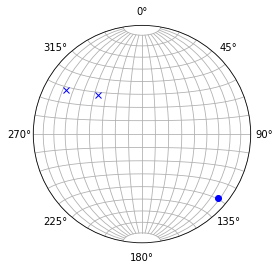

In [63]:
splot([gv1, gv2, gv3]) # we provide the arguments to the function (i.e., the vectors to plot) in a list

Note the default color, as well the default symbol used for upward-pointing geological vectors, different from the one for downward-pointing geological vectors.

We can customize the colors/symbols used for certain values, by inserting them into round brackets (i.e., creating Python tuples) and adding **at the end** of the tuple a string defining the color "*c=xxx*" and/or the marker: "*m=x*", where color and marker names are those standard for Matplotlib. See example below:

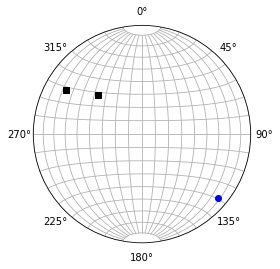

In [64]:
splot([gv1, (gv2, gv3, "m=s,c=black")])  # gv2 and gv3 are customized. "s" stands for "square" as a marker

If we want to force all measures to plot in the upper, or lower hemisphere, instead of plotting with their original orientations, we can use, after the data list, the keyword *force*, setting it to *force='upper'* or *force='lower'.

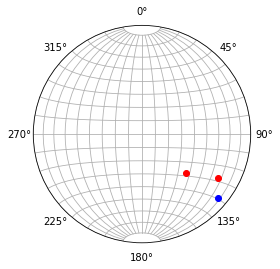

In [66]:
splot([gv1, (gv2, gv3, "m=o, c=red")], force='lower')

It is also possible to check if a geological vector is subhorizontal or subvertical:

In [33]:
GVect(130, 4).is_subhorizontal()

True

In [34]:
GVect(110, 88).is_subvertical()

True

Since the default dip angle threshold for subhorizontal and subvertical faults is 5°, for the previous examples geological vectors are considered to be respectively subhorizontal and subvertical.

We can calculate the angle between two geological vectors:

In [67]:
gv2.angle(gv3)

26.901247855937672

Since geological vectors are oriented, the angle range is from 0° to 180°.

We can check if two geological vectors are parallel, anti-parallel or sub-orthogonal:

In [68]:
gv2.almost_parallel(gv3)

False

In [37]:
GVect(90, 10).almost_antiparallel(GVect(270, -10.5))

True

In [38]:
GVect(90, 0).is_suborthogonal(GVect(0, 89.5))

True

### 2.5 Geological axes

*Geological axes* are similar to geological vectors (they *inherit* from the *GVect* class), but do not have a specific direction, i.e., they have only an orientation. As for geological vectors, they are defined by a trend and a plunge, but the two possible, opposite directions are both allowed and considered for calculations (e.g., the angles between axes), even if they are not explicit.

We can create a geological axis given trend and plunge values, or convert from geological vector to a geological axis: 

In [39]:
ga1 = GAxis(219, 24)  # creating a geological axis given trend and plunge
gv2 = GVect(92, -38)  # creating a geological vector
ga2 = gv2.as_axis()  # converting the geological vector to a geological axis

In [40]:
print(ga1, ga2) 

GAxis(219.00, +24.00) GAxis(092.00, -38.00)


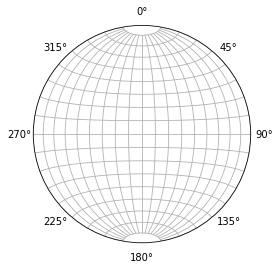

In [41]:
splot([ga1, ga2])  # note that we provide the arguments inside a list

Since GAxis instances are bi-directional, when plotting in stereonets upward-pointing cases are automatically converted to their opposite downward-pointing cases.

### 2.6 Geological planes

A *geologic plane* is a plane with orientations expressed via geological convention, i.e. the azimuth from North of the strike or dip direction, and the dip angle. The module follows the dip direction convention:

In [42]:
gpl1 = GPlane(112, 67)  # definition of a geological plane instance using the dip direction and the dip angle

In [43]:
print(gpl1)

GPlane(112.00, +67.00)


It is possible to define a geological plane also from a right-hand rule and a dip angle:

In [44]:
gpl2 = GPlane(24, 56, is_rhr_strike=True)

In [45]:
print(gpl2)

GPlane(114.00, +56.00)


We plot the two planes:

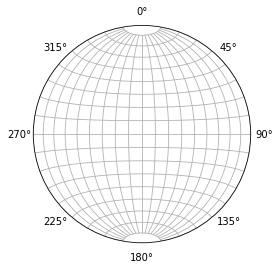

In [46]:
splot([gpl1, gpl2])

As previously said, the main distinction between geological axes and vectors is that the the former have not a direction, while the latter are oriented. This difference is reflected for instance in the calculation of the angle between two vectors and two axes:

In [47]:
vector_angle = gv1.angle(gv2)  # angle (in degrees) between two geological vectors 

In [48]:
print(vector_angle)

59.693958399595914


We convert the geological vectors to axes:

In [49]:
ga1, ga2 = gv1.as_axis(), gv2.as_axis()

In [50]:
axis_angle = ga1.angle(ga2)  # angle (in degrees) between two geological axes

In [51]:
print(axis_angle)

59.693958399595914


The angle between the two axes is the complement to 180° of the angle between the two geological vectors.

In addition to opposite, downward and upward geological vectors, it is possible to calculate the geological plane common to two geological vectors:

In [52]:
gplane = gv1.common_plane(gv2)  # geological plane common to two geological vectors (gv1 and gv2)

In [53]:
print(gplane)

GPlane(213.27, +56.40)


where the former value is the dip direction of the plane and the latter is the dip angle (downward since positive)

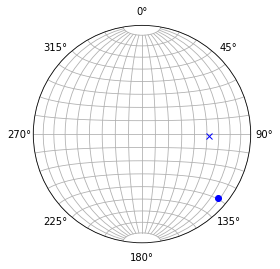

In [54]:
splot([gv1, gv2, gplane])

as well as the vector normal to both geological vectors:

In [55]:
ngv = gv1.normal_gvect(gv2)  # geological vector normal to gv1 and gv2 geological vectors

In [56]:
print(ngv)

GVect(213.27, -33.60)


where the first value is the dip direction and the second one is the dip angle.

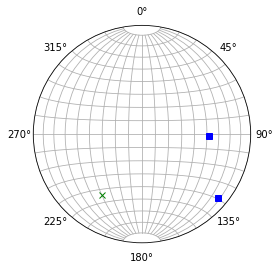

In [57]:
splot([(gv1, gv2, "c=blue, m=s"), gplane, (ngv, "c=green")])

Considering just a single geological vector, the geological plane normal to the vector is obtained via:

In [58]:
ngp = gv1.normal_gplane()  # geological plane normal to a given geological vector

In [59]:
print(ngp)

GPlane(310.00, +80.00)
